# **Többágenses rendszerek vizsgálata**

## **Bevezetés**

A gyakorlati problémák megoldásakor célszerű a probléma egyes részeit külön-külön is autonóm intelligens ágensparadigmával modellezni. Például egy okosotthonban lehet egy ágens (lásd Amazon Alexa), mely megérti a "Főzz nekem egy kávét!" emberi mondatot, illetve egy másik ágens (egy intelligens kávéfőző), amely tudja, hogyha ez az utasítás reggel hangzik el, akkor a kávét finomra darálva, cukor nélkül, kevés tejjel és nagyon gyorsan kell elkészítenie.

Így tehát a problémamegoldás folyamatában több intelligens ágens is a rendelkezésre állhat. Ezen Ságensek valószínűleg mást érzékelnek a környezetből (pl. mert máshol tartózkodnak, vagy másféle érzékelőkkel vannak ellátva), ezért működésük során némileg másképpen "gondolkodnak", így másféle beavatkozásokat is fognak végrehajtani.

Ezen beavatkozások természetesen megváltoztatják a környezetet, viszont az koránt sem biztos, hogy ami az egyik ágens szempontjából racionális cselekvés volt, az a teljes (az ún. több ágenses) rendszer szempontjából is annak tekinthető-e. Sajnos ez általánosan nem jelenthető ki, ezért különféle módszereket kell kidolgoznunk arra, hogyha egy adott környzetben egy problémát több ágens modellezésével szeretnénk megoldani.

Egy konkrét példaként említhetjük a jövő önvezető gépjárműveit, melyeket önmagunkban is intelligens ágensként kezelünk. Annak érdekében, hogy egy város forgalmát csökkenthessük, szeretnénk, ha az önvezető autók a lehető leghamarabb leparkolnának. Természetesen az autók mozgó fizikai entitások is, így be kell tartaniuk a közlekedési szabályokat, illetve csak olyan parkolóban állhatnak meg, amelyet egy másik jármű még nem foglalt el. Ez nyilvánvalóan teremt a gépkocsik között egyfajta versengést is. Mivel az önvezető autókat feltételezésünk szerint ellátták V2I (vehicle-to-infrastructure) kommunikációs modullal, az autók kooperálhatnak is, azaz megbeszélhetik, hogy melyikük hová parkoljon le.

Tömören összefoglalva tehát a laborban megoldandó többágenses feladat a következőképpen írható le:
- **Környezet:** egy város úthálózata
- **Ágensek:** önvezető autók
- **Feladat:** minden autó a lehető leggyorsabban parkoljon le
- az ágenseink alapvetően versengőek, de kommunikáció segítségével tárgyalni tudnak a közös cél elérésének érdekében

### **A szoftverkörnyezet**

A laborgyakorlat során a környezet modellezéséhez egy ún. mikroszkopikus forgalomszimulátort fogunk használni. A mikroszkopikus jelentése itt az, hogy a szimulátor képes egyedi autók szintjén modellezni a forgalmat. Ez a szimulátor a nyílt forráskódú [Eclipse SUMO](https://www.eclipse.org/sumo/) lesz (SUMO = Simulation of Urban MObility).

![python_sumo_connection](pictures/python-traci-sumo.drawio.png "Kapcsolat a JupyterLab (Python) és az Eclipse SUMO (szimulátor) között a TraCI segítségével.")

A szerverként futtatható szimulátorhoz egy interfészen, a [TraCI-n](https://sumo.dlr.de/daily/pydoc/traci.main.html) (Traffic Control Interface) keresztül fogunk csatlakozni ebből a Jupyter Notebookból. A TraCI-n keresztül lehetőségünk van a szimulátor működését is befolyásolni. Mivel a laboratóriumi foglalkozás kereteibe nem fér bele a SUMO és a TraCI mélyebb megismerése, elkészítettünk egy segédkönyvtárat (`helper.py`), amely már tartalmazza a megoldáshoz legszükségesebb függvényeket.

**Végezze el ennek a könyvtárnak az importálását!**

In [1]:
import helper

## **Parkolás koordináció nélkül**

Első lépésként vizsgáljuk meg mi történik abban az esetben, ha az ágenseink nem kooperálnak! Ez gyakorlatilag a klasszikus parkolóhely-keresés lesz: addig fognak a szimulált gépkocsik parkolóról parkolóra vándorolni, amíg nem találnak egy üres helyet.

### <a name="simulation"> **Szimuláció** </a>


A vizsgálathoz el fogjuk indítani az Eclipse SUMO-t. A SUMO-nak grafikus, és konzolos felülete is van. A laboron az érdekesség kedvéért a grafikus felületet fogjuk használni. Minden szimulációhoz szükséges az, hogy a grafikus felületen elindítsuk a szimulációt (persze lehetőségünk van arra is, hogy megállítsuk a szimulációt, illetve, hogy lépésenként futtassuk azt).

A szimulációban egy kisváros térképét látjuk 30 utcával. Az utcákon 200 autó indul útnak, hogy parkolóhelyet találjon magának. A városban 228 parkolóhely található, tehát az autók elméletileg találnak maguknak parkolóhelyet.

![SUMO-GUI](pictures/sumo_gui.drawio.png "A SUMO-GUI felülete")

**Az alábbi cellát futtatva indítsa el a SUMO-t! Ismerkedjen meg a grafikus felülettel, a szimuláció lelassítása mellett figyelje meg, hogy mi történik a szimuláció során!**
(A szimuláció lefutása után zárja be a SUMO-GUI ablakát!)

In [11]:
baseline_scenario = "basic_simulation.sumocfg"
helper.run_basic_simulation(gui_needed = True, scenario = baseline_scenario)

 Retrying in 1 seconds


### **Értékelés**

Az alábbi függvényhívások beolvassák, és grafikusan ábrázolják azt, hogy egy adott szimulációs lépésben az autók mekkora arányba parkoltak már le. **Futtassa le a következő cellát!**

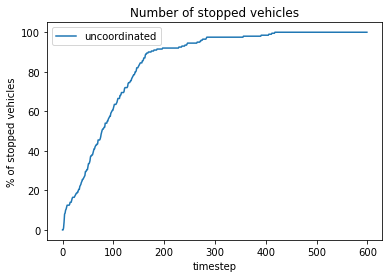

In [12]:
#beolvasandó eredményfájl
uncoordinated_output = "outputs/basic_output.xml"

#eredményfájl beolvasása (idő, érték) változópárokba:
t_uncoordinated, v_uncoordinated = helper.get_stopped_vehicles_from_output(uncoordinated_output)
#eredmények megjelenítése:
helper.plot_stopped_vehicles([t_uncoordinated], [v_uncoordinated], ["uncoordinated"]);

**Válaszoljon a következő kérdésekre!** (Szükség esetén futtassa le újra a [szimulációt](#simulation).)
 > Kb. hanyadik `timestep`-re parkolt le az összes gépjármű?
 
 <kb. 400>
 
 > Nagyjából a 150. `timestamp`-ig meredeken emelkedik a leparkolt járművek aránya, utána viszont a görbe ellaposodik. Mi lehet ennek az oka?
 
 <Eddig a szinting könnyen találnak az autók parkolóhelyet, ennél magasabb telítettségnél már keresni kell az üres helyeket.>
 
 > Empirikusan tehát mit mondhatunk, mekkora parkolóhelyfoglaltságnál kezd nehézzé válni egy szabad parkoló megtalálása? (jelen esetben a parkolóhelyek száma közel azonos a gépjárművek számával)
 
 <kb. 90%-os telítettségtől nehéz szabad parkolóhelyeket találni>

---

## **Parkolás koordinációval**

Amint láthatjuk, az önvezető autóink, azaz az ágenseink képesek megoldani a feladatot anélkül, hogy bármilyen kooperatív megoldást alkalmaznának. Viszont az is látszik, hogy az utolsó néhány jármű leparkolása kifejezetten sokáig tart. (Az első 150 lépésben sikeresen leparkol az autók 90%-a, viszont az utolsó 10%-nak még majdnem 300 lépést kell megtennie, hogy parkolót találjon.)

Vezessünk most be egy koordinációs mechanizmust a parkolóhelyek kiosztásához!

### **Az árverési eljárás**

Gyarkori feladat, hogy szűkös erőforrásokat (például parkolóhelyeket, vagy termékeket) kell elosztani versengő ágensek (például önvezető autók, vagy kereskedők) között. Ennek az elosztásnak egy többezer éves formája az árverés.

Természetesen az eladók (vagy a parkolóhely fenntartója) előírhatnak egy *minimális összeget*, ami alatt nem hajlandóak eladni az árut (a parkolóhelyet). Ez a *kikiáltási ár*.

Továbbá az árverés lehetővé teszi azt, hogy az egyes termékeket (parkolóhelyeket) minden vevő (önvezető autó) *egyénileg értékelje*. (Például értékesebb lehet egy közelebbi parkolóhely, vagy lehet, hogy van egy kedvenc parkolóhelyünk.) Így mohó módon, egy *monoton preferenciafüggvény* szerint számíthatjuk ki, hogy melyik az a parkolóhely, amiért licitálni érdemes.

Az árverési eljárás, amelyet alkalmazni fogunk, az rendelkezik egy nagyon előnyös tulajdonsággal. Méghozzá azzal, hogy az egyénileg mohó licitálással **az optimális megoldáshoz konvergál**.

#### **Az árverések lefutása**

1. A parkolóhelyek kiosztásához több árverés fog indulni (mind a 228 parkolóhelyért egy-egy).
2. Az eladók ezután ciklikusan végigkérdezik a vásárlókat arról, hogy hajlandóak-e megadni az aktuális árat.
3. Erre a vásárlók kiszámolják, hogy megadhatják-e ezt az összeget:
  - Természetesen egy felső értékhatárig (jelenleg 1000 Ft-ig) hajlandóak megadni ezt az összeget.
  - További feltétel, hogy ne álljanak nyerésre más árverésen (kizárólag 1 parkolóhelyet foglalhatnak le).
  - Feladat az is, hogy a lehető legjobb parkolóhelyért licitáljanak, ezért kiszámolják a preferenciafüggvény minimumát. (egyéni optimális megoldásra törekvés)
  - Végül igennel vagy nemmel felelnek a kérdező eladónak.
4. Az eladó megkapja a választ:
  - Ha egy vásárló hajlandó megadni az aktuális tétet, akkor az eladó azt egy kis összeggel (jelenleg 10 Ft-tal) megemeli.
5. Az eljárás folytatódik a 2. lépéssel, egészen addig, amíg le nem zárul az árverés (jelenleg 15 eredménytelen ciklusig tart ez). Ha valamely autó utoljára licitált az árverésen, akkor ő lesz az adott árverés nyertese

Amennyiben részleteiben is érdekli Önt az árverési algoritmus, nézze meg az `auction.py` állományt!

#### **Az eljárás előkészítése**

Ahogyan arról már szó volt, az árverési eljáráshoz szükséges egy minimális, ún. kikiáltási ár definiálása. **Definiáljon kikiáltási árat a 228 parkolóhelyhez!** (akár a [`numpy.random` eloszlásfüggvényeit](https://numpy.org/doc/1.16/reference/routines.random.html) is alkalmazhatja)

<span style="color:red">Figyelem, a kikiáltási ár legyen alacsonyabb, mint a maximálisan megadható ár (jelenleg 1000 Ft)! </span>

In [1]:
starting_prices = [] # <- töltse fel ezt a listát megfelelő kikiáltási árakkal

In [5]:
import numpy as np
starting_prices = np.random.normal(300, 15, 228)

Ahhoz, hogy minden gépjármű bekerüljön a szimulált úthálózatba, néhány lépésen keresztül futtatni kell a szimulációt. Ez szükséges ahhoz, hogy bizonyos paramétereket (pl. a parkolóhelyekhez mért távolságot) le tudjuk kérdezni a szimulátortól.

A következő cella futtatásakor ismét meg fog nyílni a SUMO-GUI. **Indítsa el a szimulációt,** és hagyja futni addig, amíg ezek az előkészítő lépések be nem fejeződnek. **A szimuláció az előkészítő lépések befejezésével meg fog állni, viszont ne zárja be a SUMO-GUI ablakát!**

In [2]:
import helper

#inputfájlok:
instrumented_scenario = "auction_simulation.sumocfg"
movements_file = "scenario/parking_routes.rou.xml"
parking_lot_definition = "scenario/parkings.add.xml"
#outputfájl:
output_file = "outputs/with_auctions.xml"

################ előkészítő lépések ################
#Eredeti mozgások beolvasása:
movements = helper.read_movements(movements_file)
#Parkolóhelyek beolvasása:
parking_ids, parking_capacities = helper.read_parking_lots(parking_lot_definition)
parking_capacities = [int(p_cap) for p_cap in parking_capacities]

#szimuláció előkészítése:
distance_mtx, vehicle_ids, parking_lot_occups = helper.init_controlled_simulation(
    gui_needed = True,
    scenario = instrumented_scenario,
    movements = movements,
    parking_lot_ids = parking_ids,
    output_file = output_file)

#esetleg elfoglalt parkolóhelyek levonása:
for i in range(len(parking_ids)):
    parking_capacities[i] = parking_capacities[i]-parking_lot_occups[i]

 Retrying in 1 seconds


#### **Preferenciafüggvény definiálása**

A következő feladata egy megfelelő preferenciafüggvény definiálása lesz. A vevők (lásd `auction.Buyer`) minden egyes kérdésnél kiértékelik a preferenciafüggvényt, melynek pontosan egy számot (a preferált árverés indexét) kell visszaadnia. Így tehát a preferenciafüggvény szignatúrája a következő:

`preference_function(buyer_id: str, auction_ids: list(str), current_bids: list(float)) -> int`

> Persze a függvények nem tudnak állapotokat tárolni, ezért ún. funktor objektumokat is létrehozhatunk, melyek függvényként tudnak viselkedni. Pythonban ezt úgy lehet megvalósítani, hogy létrehozunk egy osztályt (`class`-t), és a megvalósítandó működést az osztály `__call__()` függvényében adjuk meg.

A `parking_lot_preferences.py` állományban definiáltunk néhány szintaktikailag megfelelő preferenciafüggvényt. **Válasszon ezek közül egy preferenciafüggvényt! Példányosítsa a megfelelő funktorobjektumot vagy függvényt!** (A gyorsabb futás érdekében érdemes a `MinDistancePreference` funktortól *eltérőt* választani.)

In [ ]:
import parking_lot_preferences

preference_function = #.... <ide jön az Ön kódja>

In [3]:
import parking_lot_preferences
preference_function = parking_lot_preferences.BalancedCostDistancePreference(distance_mtx, parking_capacities)
#preference_function = parking_lot_preferences.min_price

### **Szimuláció**

Most már minden adott ahhoz, hogy kipróbáljuk az árveréseken alapuló parkolóhely-kiosztó eljárásunkat. **Ehhez először végezzük el az árverések kiszámítását az alábbi cella futtatásával. Figyelem, a cella futtatása néhány percig is eltarthat!**

In [6]:
#árverések és vevők létrehozása:
auctions, buyers = helper.init_auction_method(parking_capacities, vehicle_ids,
                                       starting_prices,
                                       preference_function)
#árverések futtatása:
auction_result = helper.run_auctions(auctions, buyers, verbose=True)

119 out of 203 auctions are won
50 out of 84 auctions are won
20 out of 34 auctions are won
5 out of 14 auctions are won
6 out of 9 auctions are won


Az elosztás eredménye alapján pedig nézzük meg, mi történik a szimulációban. **Futtassa le az alábbi cellát, és nézze meg, hogy mi történik a SUMO-GUI-ban!**

In [7]:
#gépkocsik-parkolóhelyek összerendelése az árverések eredménye alapján:
parking_mapping = helper.auction_results_to_parking_mapping(auction_result,
                                                           buyers,
                                                           parking_capacities, parking_ids)
#a szimuláció végigfuttatása:
helper.simulate_after_auction(parking_mapping)

### **Értékelés, összehasonlítás**

**Futtassa le a következő cellát az eredmények értékeléséhez!**

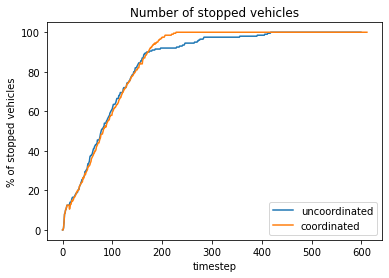

In [8]:
#beolvasandó eredményfájl
uncoordinated_output = "outputs/basic_output.xml"
coordinated_output = "outputs/with_auctions.xml"

#eredményfájl beolvasása (idő, érték) változópárokba:
t_uncoordinated, v_uncoordinated = helper.get_stopped_vehicles_from_output(uncoordinated_output)
t_coordinated, v_coordinated = helper.get_stopped_vehicles_from_output(coordinated_output)
#eredmények megjelenítése:
helper.plot_stopped_vehicles([t_uncoordinated, t_coordinated],
                             [v_uncoordinated, v_coordinated],
                             ["uncoordinated", "coordinated"]);

A görbe elején látható tüskét a szimulációs eljárás okozta: a SUMO néhány autót a kérésünk ellenére is leparkoltatott, ezeket a helyeket fel kellett szabadítanunk.

Persze jogosan merül fel a kérdés, hogy a parkolóárak hogyan változtak a folyamat során. Feltételezhetjük, hogy az árverési eljárás nélkül az Ön által definiált kikiáltási árat fizették volna a gépkocsik a parkolásért. Lássuk, hogyan viszonyulnak ehhez a parkolási költségek az árverések után! **Futtassa le a következő cellát az eredmények megjelenítéséhez!**

In [10]:
helper.print_price_differences(starting_prices, auction_result)

Cummulated parking prices (original):		59132.888309
Cummulated parking prices (after auctions):	68235.547589
Difference is 15.39%


**A kapott eredmények alapján válaszoljon a következő kérdésekre!**

> Kb. hány szimulációs lépés kellett ahhoz, hogy minden gépjármű leparkoljon?

<Kb. 200>

> Kb. mennyivel gyorsabban érte el így a rendszer a megoldást?

<400-200 = 200 (kb.)>

> Jelentős-e a parkolási díjak változása?

<ez prefereincafüggvénytől is függ, de szvsz. ez a 15-20%-os worst-case növekmény nem annyira jelentős.>

---

## **Ellenőrző kérdések**

> 1. Igaz-e az általában, hogyha minden ágens lokálisan optimális megoldást talál, akkor a többágenses rendszer megoldása is optimális?

<általában nem igaz>

> 2. Lehetséges-e az, hogy versengő ágensek kooperálnak?

<ha úgy kívánja az érdekük, akkor igen>

> 3. Az árverések során versengenek egymással a gépjárművek?

<természetesen igen>

> 4. Mi biztosítja mégis a kooperációt (és így a feladat optimális megoldását)?

<Maga az árverési algoritmus, ugyanis a megoldása a globálisan optimális megoldáshoz konvergál. Így tehát a kooperációt is biztosítja a módszer, annak ellenére, hogy maguk a járművek tisztán versengően lépnek fel egymással szemben. Persze ennél egyszerűbb válaszokat is elfogadhatunk.>

---
## **Adminisztratív adatok**

A mérést végző hallgatók:

|        neve        | neptunkódja |
|:------------------:|:-----------:|
|       hallgató1    |   NEPTUN    |
|       hallgató2    |   MEPTUN    |

Jelen `.ipynb` kiterjesztésű anyagot a laborvezetőknek történő bemutatás után csomagolják össze `.zip`-be, majd töltsék fel a [HF-portálra](http://hf.mit.bme.hu)!